In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'books-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4200521%2F7250132%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240914%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240914T125317Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D38cb4018f75b979eb7106cc5f31eff71dcf6068cb0372eb20242a03129c25d1d398907d65e7c2da842bbc9caa735af90dc53b711e066620a7fb11aa9af167127cb7d09306703c428d82daca5e91d354eb091e84e69e18273617151fdf4e22cf75c72ba3c6ce410be283b6f6c90a525a3aabc2e6fc854f438daf1b1ab395319a73ca597009bb8966f42a4c33d82ad7eb8911fd33dc7c5047103e557c4a022e895dee51155d7d07049d73b8e965ba3b0bbd2ec63bf6244cb28edef9537289175f25a3aafb95935ce106a60f26b0053b6fbb247e43188b7ee73d1b34a336e99a41e6000e56032c9e1b2b39da6a3ec2f47b2bba476a0d7485fdd80ad895ed7e9f90a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 55469565 bytes downloaded
Downloaded and uncompressed: books-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/books-dataset/BooksDataset.csv
/kaggle/input/books-dataset/BooksDatasetClean.csv


In [ ]:
df = pd.read_csv("/kaggle/input/books-dataset/BooksDataset.csv")   # Load the dataset and get info
df.describe()

,Title,Authors,Description,Category,Publisher,Publish Date,Price
count,103082,103082,70213,76912,103074,103082,103082
unique,97818,63580,68831,3106,13029,956,1387
top,The Nutcracker,By,For Ingest Only - Data needs to be cleaned up ...,"Fiction , General",Simon & Schuster,"Thursday, January 1, 2004",Price Starting at $5.29
freq,12,1043,30,2549,1521,868,41876


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103082 entries, 0 to 103081
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Title         103082 non-null  object
 1   Authors       103082 non-null  object
 2   Description   70213 non-null   object
 3   Category      76912 non-null   object
 4   Publisher     103074 non-null  object
 5   Publish Date  103082 non-null  object
 6   Price         103082 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


In [ ]:
df.head()

,Title,Authors,Description,Category,Publisher,Publish Date,Price
0,Goat Brothers,"By Colton, Larry",NaN,"History , General",Doubleday,"Friday, January 1, 1993",Price Starting at $8.79
1,The Missing Person,"By Grumbach, Doris",NaN,"Fiction , General",Putnam Pub Group,"Sunday, March 1, 1981",Price Starting at $4.99
2,Don't Eat Your Heart Out Cookbook,"By Piscatella, Joseph C.",NaN,"Cooking , Reference",Workman Pub Co,"Thursday, September 1, 1983",Price Starting at $4.99
3,When Your Corporate Umbrella Begins to Leak: A...,"By Davis, Paul D.",NaN,NaN,Natl Pr Books,"Monday, April 1, 1991",Price Starting at $4.99
4,Amy Spangler's Breastfeeding : A Parent's Guide,"By Spangler, Amy",NaN,NaN,Amy Spangler,"Saturday, February 1, 1997",Price Starting at $5.32


In [ ]:
df.isnull().sum()            # Check if there is null objects on dataset

,0
Title,0
Authors,0
Description,32869
Category,26170
Publisher,8
Publish Date,0
Price,0


In [ ]:
# Fill missing 'Description', 'Category', and 'Publisher' with 'Unknown'
df['Description'].fillna('Unknown', inplace=True)
df['Category'].fillna('Unknown', inplace=True)
df['Publisher'].fillna('Unknown', inplace=True)

In [ ]:
df.isnull().sum()

,0
Title,0
Authors,0
Description,0
Category,0
Publisher,0
Publish Date,0
Price,0


# Check most using words in that dataset

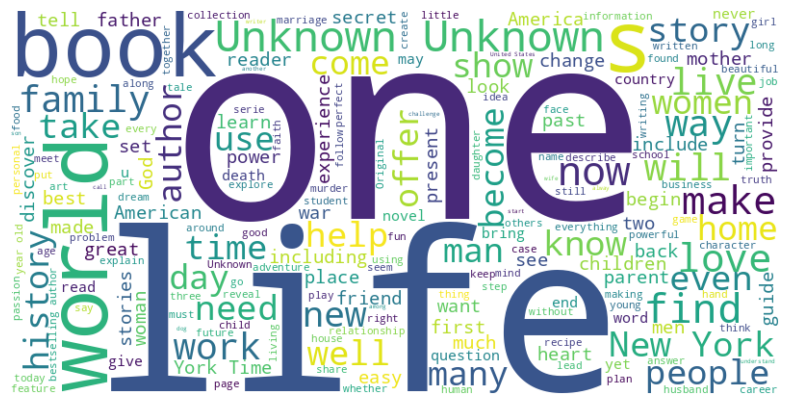

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all descriptions into a single string
text = ' '.join(df['Description'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Supervised Learning

* For training I need to convert categorical data into numerical form
* I use Label Encoding




In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
for column in ['Authors', 'Category', 'Publisher']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

* Extracting numeric part of output

In [ ]:
# Extract numeric part of Price (assuming 'Price Starting at $5.29' format)
df['Price'] = df['Price'].str.extract(r'(\d+\.\d+)').astype(float)

* Split the data into training and testing sets to evaluate the model's performance

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df[['Authors', 'Category', 'Publisher']]  # We use to make predictions based on these
y = df['Price']                               # We want to predict prices

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Random Forest Regressor Algorithm

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# the average squared difference between the predicted and actual book prices is about MSE = 73.83 units
# the lower the MSE, the better the model is at predicting

Mean Squared Error: 73.82523195193949


In [ ]:
df.head()

,Title,Authors,Description,Category,Publisher,Publish Date,Price
0,Goat Brothers,11518,Unknown,1038,3421,"Friday, January 1, 1993",8.79
1,The Missing Person,23169,Unknown,758,9279,"Sunday, March 1, 1981",4.99
2,Don't Eat Your Heart Out Cookbook,45671,Unknown,485,12722,"Thursday, September 1, 1983",4.99
3,When Your Corporate Umbrella Begins to Leak: A...,13798,Unknown,3106,7861,"Monday, April 1, 1991",4.99
4,Amy Spangler's Breastfeeding : A Parent's Guide,54159,Unknown,3106,714,"Saturday, February 1, 1997",5.32


* XGBoost Algorithm

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Initialize the XGBoost regressor model
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model on the training data
xgboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgboost_model.predict(X_test)

# Calculate Mean Squared Error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'Mean Squared Error with XGBoost: {mse_xgb}')


Mean Squared Error with XGBoost: 73.88861501156497


## Deductions
* Both, Random Forest and XGBoost algorithms' result is similar
* Both models are performing similarly, and the performance may not be ideal yet
* MSE = 73.83 this means that, on average, the square of the difference between the predicted price and the actual price is 73.83
* Example: If the actual price of a book is 10dollars , the model might predict 2dollars or $18, and the squared difference would be quite large.
* In this case, an MSE of 73.83 suggests the model’s predictions aren’t too close to the actual prices yet. The goal is to lower this error by improving the model.